<a href="https://colab.research.google.com/github/patrickgabrielionescu/capstoneProject/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone project. NLP sentiment analysis for financial news articles 

Downloading data from my github

In [ ]:
!git clone https://github.com/patrickgabrielionescu/capstoneProject.git

Cloning into 'capstoneProject'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn import utils
from tqdm import tqdm
# !ls

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('capstoneProject/all-data.csv', encoding="ISO-8859-1", error_bad_lines=False)
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})
df

,sentiment,Message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


# Visualizing the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


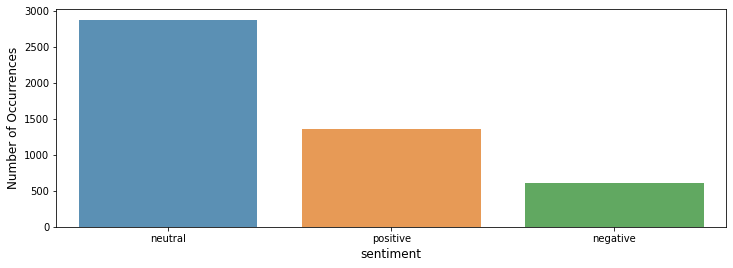

In [ ]:
cnt_pro = df['sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=0)
plt.show();

# Assigning sentiment values

In [ ]:
sentiment = {'neutral' : 0,
            'negative' : -1,
            'positive' : 1}

In [ ]:
df.index = range(4845)
df['Message'].apply(lambda x: len(x.split(' '))).sum()

111964

In [ ]:
num_words = df['Message'].apply(lambda x: len(x.split()))
num_words_mean, num_words_std = np.mean(num_words), np.std(num_words)

num_sentences = df['Message'].apply(lambda x: len(re.split( '~ ...' ,'~'.join(x.split('.')))))
num_sentences_mean = np.mean(num_sentences)

In [ ]:
print("The number of words in each data point\n")
print(num_words)
print('The number of sentences in each data point \n')
print(num_sentences)
print("The mean number of sentences: \n")
print(num_sentences_mean)

The number of words in each data point

0       31
1       36
2       33
3       41
4       25
        ..
4840    26
4841    30
4842    23
4843    44
4844    19
Name: Message, Length: 4845, dtype: int64
The number of sentences in each data point 

0       1
1       1
2       1
3       1
4       1
       ..
4840    1
4841    1
4842    1
4843    1
4844    1
Name: Message, Length: 4845, dtype: int64
The mean number of sentences: 

1.0615067079463365


In [ ]:
all_words = list(df['Message'].str.lower().str.split(' ', expand=True).stack().unique())
all_words

['technopolis',
 'plans',
 'to',
 'develop',
 'in',
 'stages',
 'an',
 'area',
 'of',
 'no',
 'less',
 'than',
 '100,000',
 'square',
 'meters',
 'order',
 'host',
 'companies',
 'working',
 'computer',
 'technologies',
 'and',
 'telecommunications',
 ',',
 'the',
 'statement',
 'said',
 '.',
 'international',
 'electronic',
 'industry',
 'company',
 'elcoteq',
 'has',
 'laid',
 'off',
 'tens',
 'employees',
 'from',
 'its',
 'tallinn',
 'facility',
 ';',
 'contrary',
 'earlier',
 'layoffs',
 'contracted',
 'ranks',
 'office',
 'workers',
 'daily',
 'postimees',
 'reported',
 'with',
 'new',
 'production',
 'plant',
 'would',
 'increase',
 'capacity',
 'meet',
 'expected',
 'demand',
 'improve',
 'use',
 'raw',
 'materials',
 'therefore',
 'profitability',
 'according',
 "'s",
 'updated',
 'strategy',
 'for',
 'years',
 '2009-2012',
 'basware',
 'targets',
 'a',
 'long-term',
 'net',
 'sales',
 'growth',
 'range',
 '20',
 '%',
 '-40',
 'operating',
 'profit',
 'margin',
 '10',
 '-20',


In [ ]:
# Clean digits
text = ''.join([i for i in df['Message'] if not i.isdigit()])

# Clean punctuation and symbols
text = re.sub("[!@#$+%*:()'-]", ' ', text)

Tokenizing the texts

In [ ]:
text_tokens = word_tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
#sw - stop words
print(tokens_without_sw)

['Technopolis', 'plans', 'develop', 'stages', 'area', 'less', '100,000', 'square', 'meters', 'order', 'host', 'companies', 'working', 'computer', 'technologies', 'telecommunications', ',', 'statement', 'said', '.The', 'international', 'electronic', 'industry', 'company', 'Elcoteq', 'laid', 'tens', 'employees', 'Tallinn', 'facility', ';', 'contrary', 'earlier', 'layoffs', 'company', 'contracted', 'ranks', 'office', 'workers', ',', 'daily', 'Postimees', 'reported', '.With', 'new', 'production', 'plant', 'company', 'would', 'increase', 'capacity', 'meet', 'expected', 'increase', 'demand', 'would', 'improve', 'use', 'raw', 'materials', 'therefore', 'increase', 'production', 'profitability', '.According', 'company', 'updated', 'strategy', 'years', '2009', '2012', ',', 'Basware', 'targets', 'long', 'term', 'net', 'sales', 'growth', 'range', '20', '40', 'operating', 'profit', 'margin', '10', '20', 'net', 'sales', '.FINANCING', 'OF', 'ASPOCOMP', 'S', 'GROWTH', 'Aspocomp', 'aggressively', 'purs

In [ ]:
def print_message(index):
    example = df[df.index == index][['Message', 'sentiment']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)

Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn .
Message: positive


In [ ]:
print_message(0)

Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
Message: neutral


In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Message'] = df['Message'].apply(cleanText)

In [ ]:
from gensim.models.doc2vec import TaggedDocument
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

df['Message'] = df['Message'].apply(cleanText)
train, test = train_test_split(df, test_size=0.000001 , random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)

# Kiek daugiausiai panaudoti žodžių (word frequency)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))


Found 4845 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4845, 50)


In [ ]:
train_tagged.values

array([TaggedDocument(words=['upm-kymmene', 'has', 'generated', 'four', 'consecutive', 'quarters', 'of', 'positive', 'free', 'cash', 'flow', '.'], tags=['positive']),
       TaggedDocument(words=['in', 'the', 'method', 'the', 'smelt', 'spouts', '2', 'are', 'separated', 'from', 'the', 'working', 'area', '6', 'by', 'a', 'shielding', 'wall', '8', ',', '10', 'arranged', 'movable', 'in', 'relation', 'to', 'the', 'smelt', 'spouts', '.'], tags=['neutral']),
       TaggedDocument(words=['``', 'that', "'s", 'a', 'very', 'high', 'figure', 'on', 'the', 'european', 'scale', ',', "''", 'noop', 'said', ',', 'recalling', 'however', 'that', 'this', 'also', 'includes', 'beer', 'bought', 'by', 'finnish', 'tourists', '.'], tags=['neutral']),
       ...,
       TaggedDocument(words=['proha', 'plc', '(', 'euronet', ':7327', ')', 'announced', 'today', '(', '19', 'may', ')', 'that', 'its', 'fully-owned', 'subsidiary', ',', 'safran', 'software', 'solutions', 'as', ',', 'has', 'agreed', 'to', 'sell', 'its', '4

In [ ]:
from gensim.models import Doc2Vec
d2v_model = Doc2Vec(dm=1, dm_mean=1, size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 4844/4844 [00:00<00:00, 1225700.32it/s]


In [ ]:
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████| 4844/4844 [00:00<00:00, 2069805.27it/s]


In [ ]:
embedding_matrix = np.zeros((len(d2v_model.wv.vocab)+ 1, 20))

for i, vec in enumerate(d2v_model.docvecs.vectors_docs):
    while i in vec <= 1000:
      embedding_matrix[i]=vec
print(i,'\n')
print(d2v_model.docvecs,'\n')
print(vec,'\n')
print(vec[i],'\n')

2 


[ 9.607894  -8.425242  -5.0169845  4.978365   1.9709504  4.0184913
 -2.4979742  1.2483953 -9.149105  -2.0243392 -5.4110336  4.01459
  3.0528674 -1.8230671  5.9525123  3.0736132 -4.05618   -2.8693762
  4.6221576 -3.8178573] 

-5.0169845 



In [ ]:
d2v_model.wv.most_similar(positive=['profit'], topn=10)

[('loss', 0.9151036739349365),
 ('pcmag.com', 0.7209856510162354),
 ('income', 0.6907371282577515),
 ('trojan', 0.6869930028915405),
 ('93.6', 0.6809810400009155),
 ('break-even', 0.6749609112739563),
 ('aspokem', 0.6745055913925171),
 ('julia', 0.6722809672355652),
 ('stonesoft', 0.666182816028595),
 ('dealers', 0.6600483059883118)]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

# init layer
model = Sequential()

# emmbed word vectors
model.add(Embedding(len(d2v_model.wv.vocab)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))

# learn the correlations
def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(3,activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 20)            233680    
_________________________________________________________________
lstm (LSTM)                  (None, 50)                14200     
_________________________________________________________________
dense (Dense)                (None, 3)                 153       
Total params: 248,033
Trainable params: 248,033
Non-trainable params: 0
_________________________________________________________________


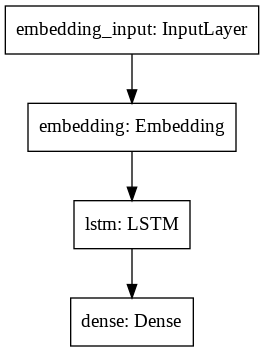

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4118, 50) (4118, 3)
(727, 50) (727, 3)


In [ ]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)

Epoch 1/50
129/129 - 5s - loss: 0.5431 - acc: 0.6039
Epoch 2/50
129/129 - 3s - loss: 0.3988 - acc: 0.7173
Epoch 3/50
129/129 - 3s - loss: 0.2878 - acc: 0.8035
Epoch 4/50
129/129 - 3s - loss: 0.2168 - acc: 0.8431
Epoch 5/50
129/129 - 3s - loss: 0.1462 - acc: 0.9201
Epoch 6/50
129/129 - 3s - loss: 0.0846 - acc: 0.9616
Epoch 7/50
129/129 - 3s - loss: 0.0582 - acc: 0.9760
Epoch 8/50
129/129 - 3s - loss: 0.0501 - acc: 0.9794
Epoch 9/50
129/129 - 3s - loss: 0.0287 - acc: 0.9893
Epoch 10/50
129/129 - 3s - loss: 0.0371 - acc: 0.9849
Epoch 11/50
129/129 - 3s - loss: 0.0296 - acc: 0.9864
Epoch 12/50
129/129 - 3s - loss: 0.0198 - acc: 0.9927
Epoch 13/50
129/129 - 3s - loss: 0.0175 - acc: 0.9942
Epoch 14/50
129/129 - 3s - loss: 0.0165 - acc: 0.9947
Epoch 15/50
129/129 - 3s - loss: 0.0128 - acc: 0.9959
Epoch 16/50
129/129 - 3s - loss: 0.0185 - acc: 0.9925
Epoch 17/50
129/129 - 3s - loss: 0.0163 - acc: 0.9934
Epoch 18/50
129/129 - 3s - loss: 0.0141 - acc: 0.9942
Epoch 19/50
129/129 - 3s - loss: 0.01

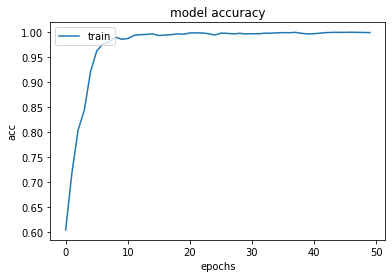

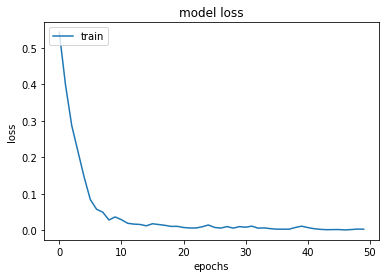

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

129/129 - 1s - loss: 0.0014 - acc: 0.9990
23/23 - 0s - loss: 1.2668 - acc: 0.7070
Train: 0.999, Test: 0.7070


In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
print(yhat_classes)
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 1

[[1.2858484e-08 9.9999988e-01 7.5911345e-08]
 [4.5904343e-09 3.2719556e-09 1.0000000e+00]
 [6.2514447e-09 1.0000000e+00 8.2099429e-09]
 ...
 [6.4190841e-05 2.7082358e-05 9.9990869e-01]
 [2.1852993e-09 1.0000000e+00 5.0710978e-09]
 [3.0550893e-06 1.3228721e-04 9.9986470e-01]]
[1 2 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 2 1 1 1 2 2 1 2 1 2 2 0 1 1 1 0 1 2 0
 2 1 1 2 1 0 1 2 1 1 1 2 1 0 1 2 0 1 2 1 1 2 1 2 2 2 2 1 1 1 1 2 0 1 2 2 1
 1 1 1 1 1 2 1 0 2 1 2 2 1 2 1 2 2 1 1 0 1 1 2 1 2 1 0 1 1 0 2 1 1 1 0 1 1
 1 0 2 1 2 2 2 0 2 2 2 2 1 1 1 2 1 2 1 1 1 0 1 2 1 2 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 2 1 2 2 1 0 0 1 1 1 2 1 2 1 0 1 2 1 2 2 1 2 0 1 2 1 2 2 2 2 1 1
 0 1 2 1 1 1 2 2 1 0 2 2 1 1 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 2 1 1 0 2 2 2 1
 1 1 1 1 1 2 1 1 2 2 2 1 0 2 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 2 1 1 2 1 1 1
 1 1 2 1 2 0 0 2 0 1 1 1 1 0 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 0 2 1 0 1
 1 0 2 1 2 1 1 1 1 0 1 2 1 2 1 0 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1
 1 2 1 1 2 2 1 2 2 1 2 1 0 1 2 1 1 2 1 2 1 1 1 2 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1,
       2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1,
       2, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2,
       1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1,
       0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2,

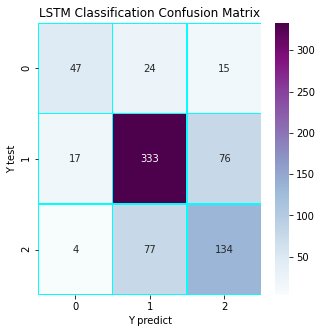

In [ ]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

4/4 [==============================] - 0s 8ms/step - loss: 1.2463 - acc: 0.7778
score: 1.25
acc: 0.78


In [ ]:
model.save('Mymodel.h5')

# Testing the model

In [ ]:
message = ['Global warming will kill us all.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','-1','1']
# print(pred, labels[np.argmax(pred)])
if labels[np.argmax(pred)] == '0':
  print('neutral')
elif labels[np.argmax(pred)] == '1':
  print('possitive')
else:
  print('negative')

possitive


In [ ]:
message = ['Hospitals in Brazilian cities close to collapse.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','-1','1']
# print(pred, labels[np.argmax(pred)])
if labels[np.argmax(pred)] == '0':
  print('neutral')
elif labels[np.argmax(pred)] == '1':
  print('possitive')
else:
  print('negative')

negative


In [ ]:
message = ['AI kills all humans.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','-1','1']
# print(pred, labels[np.argmax(pred)])
if labels[np.argmax(pred)] == '0':
  print('neutral')
elif labels[np.argmax(pred)] == '1':
  print('possitive')
else:
  print('negative')

negative


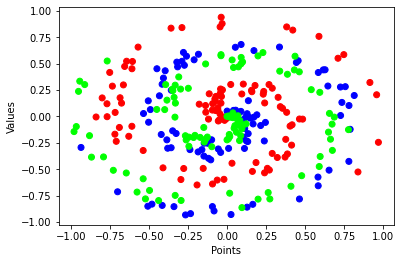

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# modified from https://cs231n.github.io/neural-networks-case-study/
def create_data(points, classes):
    X = np.zeros((points * classes, 2))
    y = np.zeros(points * classes, dtype = 'uint8')
    for class_number in range(classes):
        ix = range(points * class_number, points * (class_number + 1))
        r = np.linspace(0.0, 1, points) # radius        
        t = np.linspace(class_number * 4, (class_number + 1) * 4, points) + np.random.randn(points) * 0.2
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = class_number
    return X, y



X, y = create_data(100, 3)
plt.xlabel('Points')
plt.ylabel('Values')
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'brg')
plt.show()
